<a href="https://colab.research.google.com/github/devCat404/python_projects/blob/main/BD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# step1. Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò Î∞è Îç∞Ïù¥ÌÑ∞ ÏàòÏßë&Í∞ÄÍ≥µ Îã®Í≥Ñ
import pandas as pd
import chardet

# 0. ÌååÏùº Í≤ΩÎ°ú Ï†ïÏùò
base_rate_path = "/base_rate.csv"                  # Í∏∞Ï§ÄÍ∏àÎ¶¨
house_price_path = "/house_price_avg.csv"          # ÌèâÍ∑† Ï£ºÌÉùÍ∞ÄÍ≤©
income_path = "/income_per_year.csv"               # Ïó∞Í∞Ñ ÏÜåÎìù
interest_rate_path = "/interest_rate.csv"          # Ï£ºÎã¥ÎåÄ Í∏àÎ¶¨
marriage_path = "/mariage_per_year.csv"            # ÌòºÏù∏ Í±¥Ïàò
marriage_age_path = "/marriage_age_rate.csv"       # ÌòºÏù∏ Ïó∞Î†π
pir_path = "/pir.csv"                              # pir Îç∞Ïù¥ÌÑ∞

years = list(range(2019, 2025))

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
base_rate_df = pd.read_csv(base_rate_path, encoding='utf-8-sig')
house_price_df = pd.read_csv(house_price_path, encoding='utf-8-sig')
income_df = pd.read_csv(income_path, encoding='utf-8-sig')
interest_rate_df = pd.read_csv(interest_rate_path, encoding='cp949')
marriage_df = pd.read_csv(marriage_path, encoding='utf-8-sig')

with open(marriage_age_path, 'rb') as f:
    enc = chardet.detect(f.read())['encoding']
marriage_age_df = pd.read_csv(marriage_age_path, encoding=enc)

# 2. Í∏∞Ï§ÄÍ∏àÎ¶¨ Ï≤òÎ¶¨
base_rate_long = base_rate_df.melt(
    id_vars=['ÌÜµÍ≥ÑÌëú', 'Í≥ÑÏ†ïÌï≠Î™©', 'Îã®ÏúÑ', 'Î≥ÄÌôò'],
    var_name='Ïó∞ÎèÑ', value_name='Í∏∞Ï§ÄÍ∏àÎ¶¨'
)
base_rate_long['Ïó∞ÎèÑ'] = base_rate_long['Ïó∞ÎèÑ'].astype(int)
base_rate_long = base_rate_long[base_rate_long['Ïó∞ÎèÑ'].isin(years)][['Ïó∞ÎèÑ', 'Í∏∞Ï§ÄÍ∏àÎ¶¨']]

# 3. Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨ Ï≤òÎ¶¨ (Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑†)
loan_rate = interest_rate_df.iloc[0, 1:]
annual_rates = loan_rate.groupby(loan_rate.index.str[:4]).mean().reset_index()
annual_rates.columns = ['Ïó∞ÎèÑ', 'Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨']
annual_rates['Ïó∞ÎèÑ'] = annual_rates['Ïó∞ÎèÑ'].astype(int)
annual_rates = annual_rates[annual_rates['Ïó∞ÎèÑ'].isin(years)]

# 4. ÌèâÍ∑†ÏÜåÎìù Ï≤òÎ¶¨
income_row = income_df[
    (income_df['ÌñâÏ†ïÍµ¨Ïó≠Î≥Ñ'] == 'Ï†ÑÍµ≠') &
    (income_df['ÏûêÏÇ∞, Î∂ÄÏ±Ñ, ÏÜåÎìù Î∂ÑÎ•òÎ≥Ñ'].str.contains('Í≤ΩÏÉÅÏÜåÎìù'))
]
income_long = income_row.melt(
    id_vars=['ÌñâÏ†ïÍµ¨Ïó≠Î≥Ñ', 'ÏûêÏÇ∞, Î∂ÄÏ±Ñ, ÏÜåÎìù Î∂ÑÎ•òÎ≥Ñ'],
    var_name='Ïó∞ÎèÑ', value_name='ÌèâÍ∑†ÏÜåÎìù'
)[['Ïó∞ÎèÑ', 'ÌèâÍ∑†ÏÜåÎìù']]
income_long['Ïó∞ÎèÑ'] = income_long['Ïó∞ÎèÑ'].astype(int)
income_long = income_long[income_long['Ïó∞ÎèÑ'].isin(years)]
income_long['ÌèâÍ∑†ÏÜåÎìù'] *= 10000  # ÎßåÏõê ‚Üí Ïõê

# 5. ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤© Ï≤òÎ¶¨
house_nation = house_price_df[house_price_df['ÌñâÏ†ïÍµ¨Ïó≠Î≥Ñ'] == 'Ï†ÑÍµ≠'].drop(columns=['ÌñâÏ†ïÍµ¨Ïó≠Î≥Ñ'])
house_nation.columns = pd.to_datetime(house_nation.columns, format="%Y.%m")
house_nation_by_year = house_nation.T.groupby(lambda x: x.year).mean().reset_index()
house_nation_by_year.columns = ['Ïó∞ÎèÑ', 'ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©']
house_nation_by_year = house_nation_by_year[house_nation_by_year['Ïó∞ÎèÑ'].isin(years)]

# 6. ÌòºÏù∏Í±¥Ïàò Ï≤òÎ¶¨
marriage_df = marriage_df[marriage_df['ÏßÄÏó≠'] == 'Ï†ÑÍµ≠'][['Ïó∞ÎèÑ', 'ÌòºÏù∏Í±¥Ïàò']]

# 7. PIR Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
pir_df = pd.read_csv(pir_path)
nation_pir = pir_df[pir_df['ÏßÄÏó≠'].str.contains('Ï†ÑÏ≤¥|Ï†ÑÍµ≠')].iloc[0]
pir_long = pd.DataFrame({
    'Ïó∞ÎèÑ': list(range(2019, 2025)),
    'PIR': [nation_pir[str(year)] for year in range(2019, 2025)]
})

# 8. ÌÜµÌï© ÌÖåÏù¥Î∏î ÏÉùÏÑ±
final_df = base_rate_long \
    .merge(annual_rates, on='Ïó∞ÎèÑ') \
    .merge(income_long, on='Ïó∞ÎèÑ') \
    .merge(house_nation_by_year, on='Ïó∞ÎèÑ') \
    .merge(marriage_df, on='Ïó∞ÎèÑ') \
    .merge(pir_long, on='Ïó∞ÎèÑ')

# 9. ÌôïÏù∏
print(final_df)

     Ïó∞ÎèÑ  Í∏∞Ï§ÄÍ∏àÎ¶¨   Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨      ÌèâÍ∑†ÏÜåÎìù      ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©    ÌòºÏù∏Í±¥Ïàò  PIR
0  2019  1.25  3.4475  58640000   90.016667  239159  5.4
1  2020  0.50     2.8  59660000   92.575000  213502  5.5
2  2021  1.00  2.8825  61800000  100.450000  192507  6.7
3  2022  3.25   4.295  64700000  103.866667  191690  6.3
4  2023  3.50    5.19  67620000   96.250000  193657  6.3
5  2024  3.00   4.725  71850000   96.025000  222412  6.3


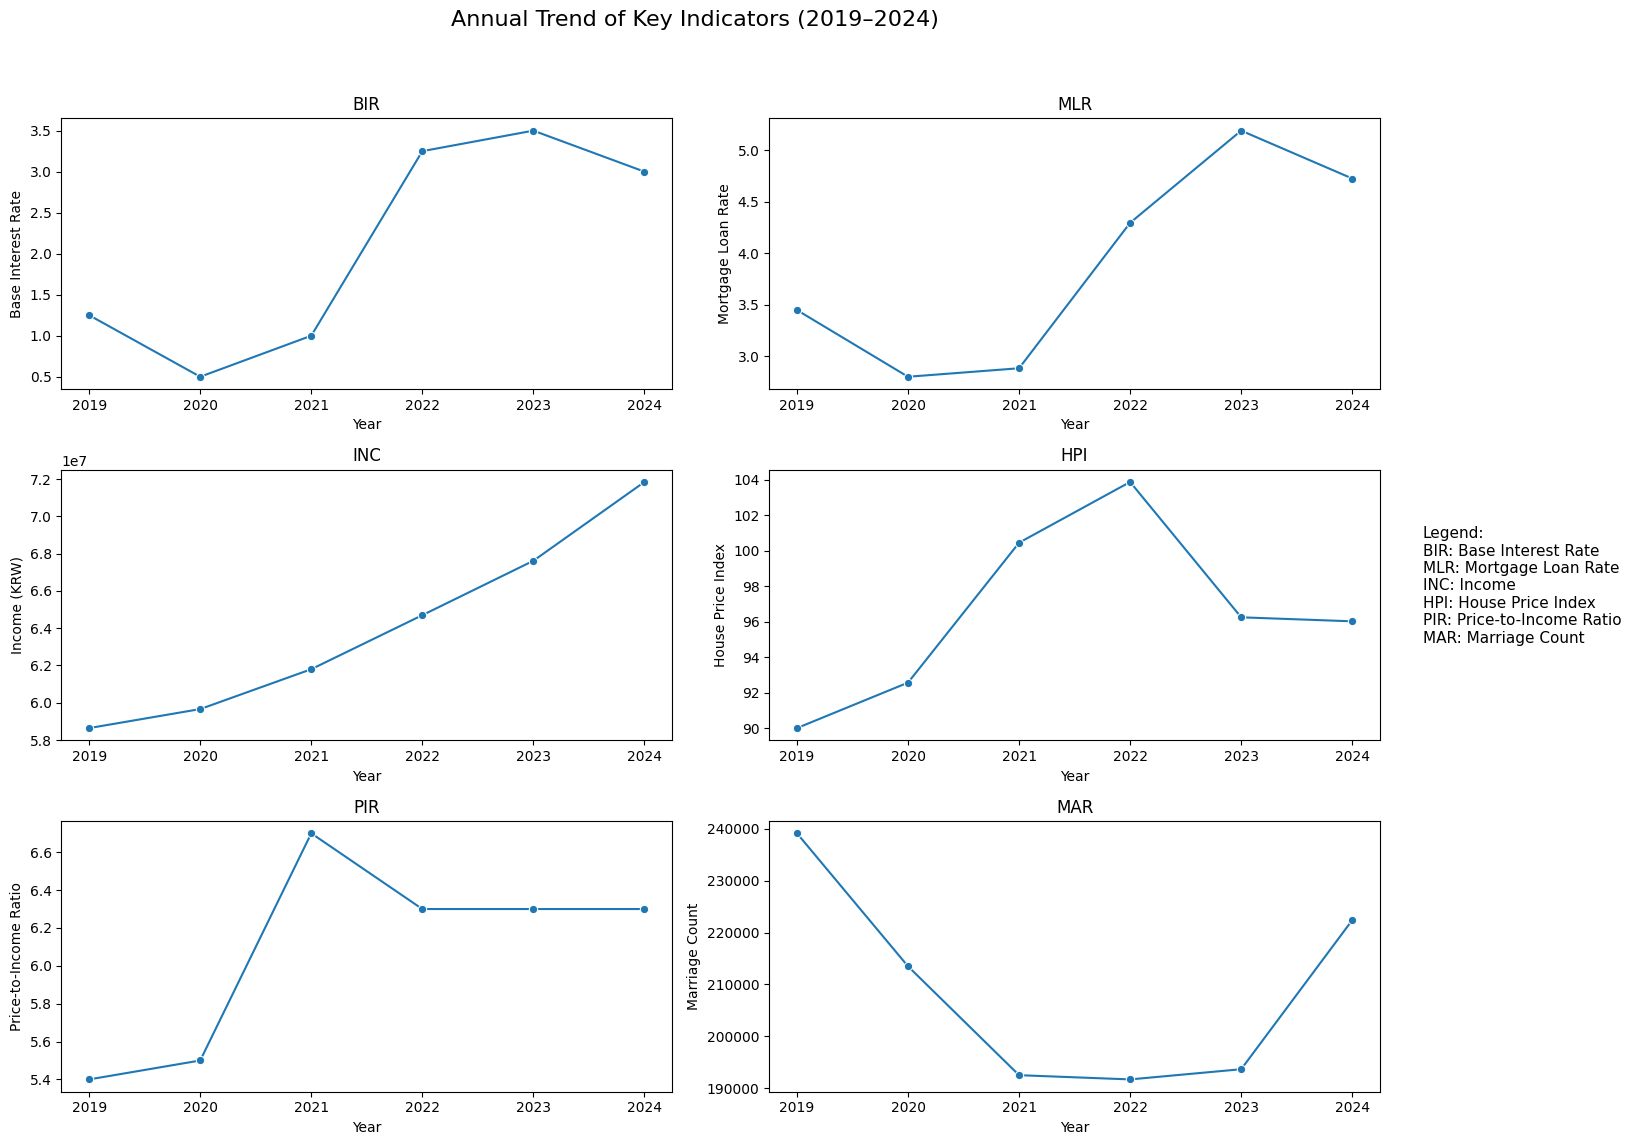

In [5]:
# step 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(EDA) Î∞è ÏãúÍ∞ÅÌôî Îã®Í≥Ñ - Í¥ÄÍ≥Ñ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
import matplotlib.pyplot as plt
import seaborn as sns

# ÏïΩÏñ¥ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
abbr_map = {
    'BIR': 'Base Interest Rate',
    'MLR': 'Mortgage Loan Rate',
    'INC': 'Income',
    'HPI': 'House Price Index',
    'PIR': 'Price-to-Income Ratio',
    'MAR': 'Marriage Count'
}

# ÌîåÎ°Ø ÏÉùÏÑ± Î∞è Ï†úÎ™© Îã¨Í∏∞
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Annual Trend of Key Indicators (2019‚Äì2024)', fontsize=16)

# Í∞Å subplot ---------------------------------------------------------------
# 1. Í∏∞Ï§ÄÍ∏àÎ¶¨ Ï∂îÏù¥ Í∑∏ÎûòÌîÑ
sns.lineplot(data=final_df, x='Ïó∞ÎèÑ', y='Í∏∞Ï§ÄÍ∏àÎ¶¨', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('BIR')
axes[0, 0].set_ylabel('Base Interest Rate')
axes[0, 0].set_xlabel('Year')

# 2. Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú Í∏àÎ¶¨ Ï∂îÏù¥ Í∑∏ÎûòÌîÑ
sns.lineplot(data=final_df, x='Ïó∞ÎèÑ', y='Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('MLR')
axes[0, 1].set_ylabel('Mortgage Loan Rate')
axes[0, 1].set_xlabel('Year')

# 3. ÌèâÍ∑† ÏÜåÎìù Ï∂îÏù¥ Í∑∏ÎûòÌîÑ
sns.lineplot(data=final_df, x='Ïó∞ÎèÑ', y='ÌèâÍ∑†ÏÜåÎìù', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('INC')
axes[1, 0].set_ylabel('Income (KRW)')
axes[1, 0].set_xlabel('Year')

# 4. ÌèâÍ∑† Ï£ºÌÉù Í∞ÄÍ≤© Ï∂îÏù¥ Í∑∏ÎûòÌîÑ
sns.lineplot(data=final_df, x='Ïó∞ÎèÑ', y='ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('HPI')
axes[1, 1].set_ylabel('House Price Index')
axes[1, 1].set_xlabel('Year')

# 5. PIR Ï∂îÏù¥ Í∑∏ÎûòÌîÑ
sns.lineplot(data=final_df, x='Ïó∞ÎèÑ', y='PIR', marker='o', ax=axes[2, 0])
axes[2, 0].set_title('PIR')
axes[2, 0].set_ylabel('Price-to-Income Ratio')
axes[2, 0].set_xlabel('Year')

# 6. Ïó∞Í∞Ñ ÌòºÏù∏Í±¥Ïàò Í∑∏ÎûòÌîÑ
sns.lineplot(data=final_df, x='Ïó∞ÎèÑ', y='ÌòºÏù∏Í±¥Ïàò', marker='o', ax=axes[2, 1])
axes[2, 1].set_title('MAR')
axes[2, 1].set_ylabel('Marriage Count')
axes[2, 1].set_xlabel('Year')
# --------------------------------------------------------------------------

# Î≤îÎ°Ä (ÏïΩÏñ¥ ÎîïÏÖîÎÑàÎ¶¨ ÌôúÏö©)
legend_text_eng = '\n'.join([f'{k}: {v}' for k, v in abbr_map.items()])
fig.text(1.02, 0.5, f'Legend:\n{legend_text_eng}', fontsize=11, va='center')

# plot Î≥¥Ïó¨Ï£ºÍ∏∞
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

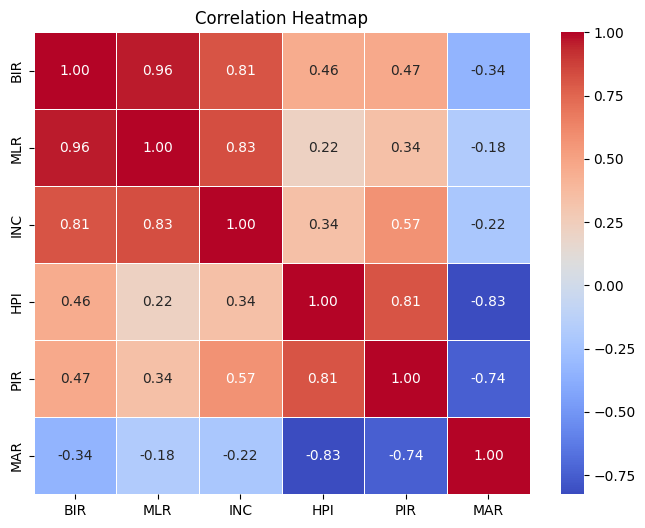

In [6]:
# step 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(EDA) Î∞è ÏãúÍ∞ÅÌôî Îã®Í≥Ñ - ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ

import numpy as np

# Î®ºÏ†Ä ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞ (Í¥ÄÏ∏°Îêú ÏàòÏπòÌòï Î≥ÄÏàòÎßå)
corr_df = final_df[['Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨', 'ÌèâÍ∑†ÏÜåÎìù', 'ÌèâÍ∑†Ï£ºÌÉùÍ∞ÄÍ≤©', 'PIR', 'ÌòºÏù∏Í±¥Ïàò']]
corr_df.columns = ['BIR', 'MLR', 'INC', 'HPI', 'PIR', 'MAR']
corr_matrix = corr_df.corr()

# ÏãúÍ∞ÅÌôî - ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# step 3. Î™®Îç∏ÎßÅ Î∞è 2025ÎÖÑÎèÑ ÏòàÏ∏° Îã®Í≥Ñ (1. Î¶øÏßÄ ÌöåÍ∑Ä Ï†ÅÏö©)
from sklearn.linear_model import Ridge
import numpy as np

# 1. ÏûÖÎ†• ÌäπÏÑ±Í≥º ÌÉÄÍπÉÍ∞í Íµ¨ÏÑ±
X_ridge = final_df[['Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨', 'PIR']].astype(float).to_numpy()
y_ridge = final_df['ÌòºÏù∏Í±¥Ïàò'].astype(float).to_numpy()

# 2. Ridge ÌöåÍ∑Ä Î™®Îç∏ÎßÅ
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_ridge, y_ridge)

# 3. 2025ÎÖÑ ÏòàÏ∏°Ïö© ÏûÖÎ†•Í∞í Ï†ïÏùò
X_2025_input = np.array([[2.75, 4.17, 7.12]])  # [Í∏∞Ï§ÄÍ∏àÎ¶¨, Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨, PIR]

# 4. ÏòàÏ∏°
y_2025_ridge_pred = ridge_model.predict(X_2025_input)[0]
print(f"2025ÎÖÑÎèÑ ÌòºÏù∏Í±¥Ïàò ÏòàÏ∏°: {round(y_2025_ridge_pred)} (Í±¥)")

2025ÎÖÑÎèÑ ÌòºÏù∏Í±¥Ïàò ÏòàÏ∏°: 191784 (Í±¥)


In [8]:
# step 3. Î™®Îç∏ÎßÅ Î∞è 2025ÎÖÑÎèÑ ÏòàÏ∏° Îã®Í≥Ñ (2. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä Ï†ÅÏö©)
from sklearn.ensemble import RandomForestRegressor

# 1. ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ± (Í∏∞Ï§ÄÍ∏àÎ¶¨, Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨, PIR)
X_rf = final_df[['Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Ï£ºÎã¥ÎåÄÍ∏àÎ¶¨', 'PIR']].astype(float).to_numpy()
y_rf = final_df['ÌòºÏù∏Í±¥Ïàò'].astype(float).to_numpy()

# 2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Ï†ïÏùò Î∞è ÌõàÎ†®
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# 3. 2025ÎÖÑ ÏûÖÎ†•Í∞í Íµ¨ÏÑ± Î∞è ÏòàÏ∏°
X_2025_rf = np.array([[2.75, 4.17, 7.12]])
y_2025_rf_pred = rf_model.predict(X_2025_rf)[0]

print(f"2025ÎÖÑÎèÑ ÌòºÏù∏Í±¥Ïàò ÏòàÏ∏°: {round(y_2025_rf_pred)} (Í±¥)")

2025ÎÖÑÎèÑ ÌòºÏù∏Í±¥Ïàò ÏòàÏ∏°: 203261 (Í±¥)


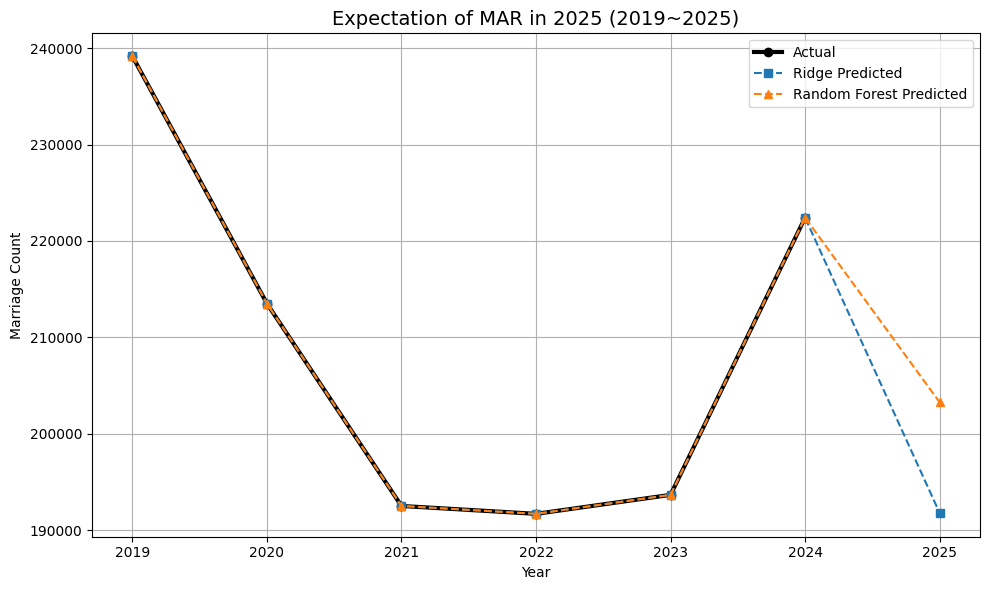

In [12]:
# step 3-2. Îëê Í∞ÄÏßÄ Î™®Îç∏ ÎπÑÍµê Î∂ÑÏÑù

# 1. Ïã§Ï†ú ÌòºÏù∏Í±¥Ïàò Î∞è Ïó∞ÎèÑ Î™©Î°ù Ï†ïÏùò
years = final_df['Ïó∞ÎèÑ'].tolist()
actual = final_df['ÌòºÏù∏Í±¥Ïàò'].tolist()

# 2. 2025ÎÖÑ ÏòàÏ∏°Í∞íÏùÑ Ï∂îÍ∞ÄÌïú Ïó∞ÎèÑ Î∞è ÏòàÏ∏° Î™©Î°ù ÏÉùÏÑ±
years_with_2025 = years + [2025]
ridge_pred = actual + [round(y_2025_ridge_pred)]     # Ridge ÏòàÏ∏° Í≤∞Í≥º
rf_pred = actual + [round(y_2025_rf_pred)]           # RandomForest ÏòàÏ∏° Í≤∞Í≥º

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(years, actual, label='Actual', marker='o', linewidth=3, color='black')
plt.plot(years_with_2025, ridge_pred, label='Ridge Predicted', marker='s', linestyle='--')
plt.plot(years_with_2025, rf_pred, label='Random Forest Predicted', marker='^', linestyle='--')

plt.title('Expectation of MAR in 2025 (2019~2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Marriage Count')
plt.xticks(years_with_2025)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Î™®Îç∏Ïóê ÎåÄÌïú Í≤ÄÏ¶ù Îã®Í≥Ñ
# --> Ï†ïÎãµÏùÑ Í∞ÄÏßÑ 2017, 8ÎÖÑÏùò ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞(PIR, MLR, BIR) ÏùÑ Í∞ÄÏßÄÍ≥† Ï†ïÎãµÎç∞Ïù¥ÌÑ∞(MAR)Í≥º ÎπÑÍµêÌïòÏó¨ ÏûîÏ∞® Íµ¨ÌïòÍ≥† Validation ÌèâÍ∞Ä

# MAPE (Ï†àÎåÄÌèâÍ∑†Ïò§Ï∞® ÌôúÏö©: Ïã§Ï†úÍ∞íÏóê ÎåÄÌïú Ïò§Ï∞®ÎπÑÏú®(%))
from sklearn.metrics import mean_absolute_percentage_error

# 2017ÎÖÑÎèÑÏùò Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•
val_x_17 = {
    'years' : 2017,
    'PIR' : 5.6,
    'MLR' : 3.27,
    'BIR' : 1.75
}

# 2018ÎÖÑÎèÑÏùò Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•
val_x_18 = {
    'years' : 2008,
    'PIR' : 5.7,
    'MLR' : 3.39,
    'BIR' : 1.5
}

# Ï†ïÎãµÎì§
val_y_17 = {'MAR': 264455 }
val_y_18 = {'MAR': 257622 }

# Ridge ÌöåÍ∑Ä ÏòàÏ∏° (2017, 2018)
ridge_pred_17 = ridge_model.predict(np.array([[val_x_17['PIR'], val_x_17['MLR'], val_x_17['BIR']]]))
ridge_pred_18 = ridge_model.predict(np.array([[val_x_18['PIR'], val_x_18['MLR'], val_x_18['BIR']]]))

# Random Forest ÏòàÏ∏° (2017, 2018)
rf_pred_17 = rf_model.predict(np.array([[val_x_17['PIR'], val_x_17['MLR'], val_x_17['BIR']]]))
rf_pred_18 = rf_model.predict(np.array([[val_x_18['PIR'], val_x_18['MLR'], val_x_18['BIR']]]))

# MAPE Í≥ÑÏÇ∞
ridge_mape_17 = mean_absolute_percentage_error([val_y_17['MAR']], ridge_pred_17)
ridge_mape_18 = mean_absolute_percentage_error([val_y_18['MAR']], ridge_pred_18)
rf_mape_17 = mean_absolute_percentage_error([val_y_17['MAR']], rf_pred_17)
rf_mape_18 = mean_absolute_percentage_error([val_y_18['MAR']], rf_pred_18)

# MAPE ÌôïÏù∏
print(f"Ridge MAPE (2017): {ridge_mape_17:.2%}")
print(f"Ridge MAPE (2018): {ridge_mape_18:.2%}")

print("--" * 30)

print(f"Random Forest MAPE (2017): {rf_mape_17:.2%}")
print(f"Random Forest MAPE (2018): {rf_mape_18:.2%}")

Ridge MAPE (2017): 5.99%
Ridge MAPE (2018): 2.10%
------------------------------------------------------------
Random Forest MAPE (2017): 16.73%
Random Forest MAPE (2018): 14.52%


| Î™®Îç∏                | 2017ÎÖÑ MAPE | 2018ÎÖÑ MAPE | Ï¢ÖÌï© ÌèâÍ∞Ä    |
| ----------------- | ---------- | ---------- | -------- |
| **Ridge ÌöåÍ∑Ä**      | 5.99%      | 2.10%      | üîµ Îß§Ïö∞ Ïö∞Ïàò |
| **Random Forest** | 16.73%     | 14.52%     | üü° ÏàòÏö© Í∞ÄÎä• |


# Î¶øÏßÄ ÌöåÍ∑ÄÏóê ÎπÑÌï¥ÏÑúÎäî ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Í∞Ä ÏùºÎ∞òÏÑ±Ïù¥ Îñ®Ïñ¥Ïßê.

--> Îã®Ïàú Î≥ÄÏàò ÌöåÍ∑ÄÏóê ÎåÄÌï¥ÏÑúÎäî ÏÑ†ÌòïÌöåÍ∑ÄÍ∞Ä ÎπÑÏÑ†ÌòïÎ≥¥Îã§ Ïú†Î¶¨ÌïòÎã§Í≥† ÏÉùÍ∞Å.